In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Data Source (UCI): Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31
bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

#### Output variable:
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [4]:
# Check any missing vaslues
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print(df.shape[0])
print(df.shape[1])

41188
21


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

### Data Visualization

<Figure size 576x432 with 0 Axes>

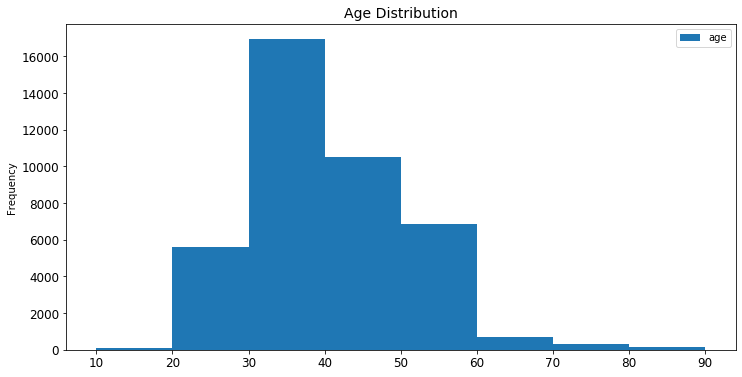

In [121]:
age = df['age'].sort_values(ascending=False).reset_index()
age.drop('index', axis=1, inplace=True)

fig = plt.figure(figsize=[8, 6])

age.plot.hist(by=age['age'], bins=range(10, 100, 10), figsize=[12, 6])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

- Mainly age group between 30-40 were selected for direct marketing campaign via phone calls

In [140]:
duration = df['duration'].sort_values(ascending=False).reset_index()
duration.drop('index', axis=1, inplace=True)
duration.describe()

,duration
count,41188.000000
mean,258.285010
std,259.279249
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


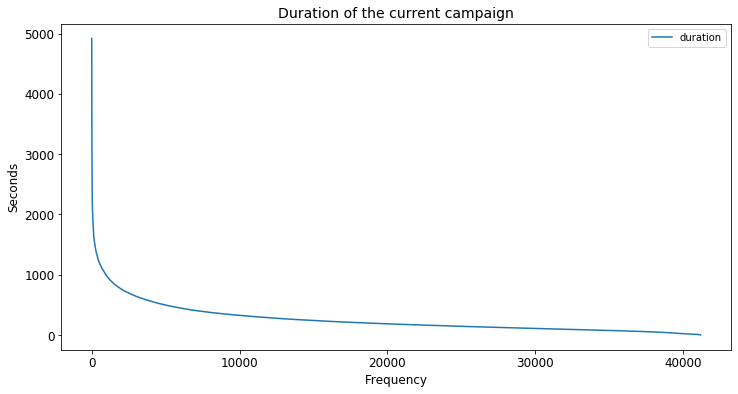

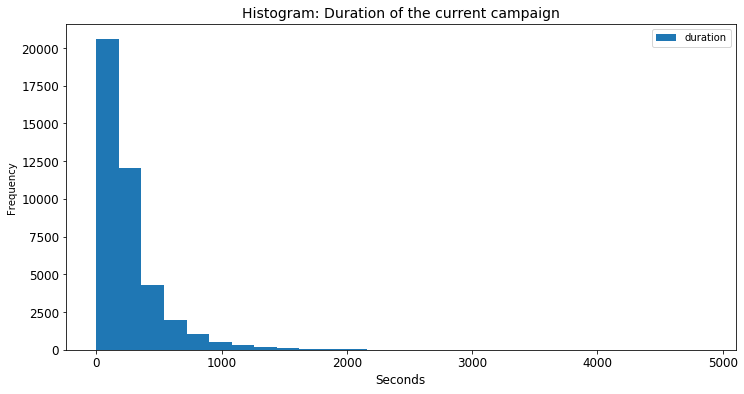

In [141]:
duration.plot(figsize=[12, 6])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Seconds', fontsize= 12)
plt.xlabel('Frequency', fontsize= 12)
plt.title('Duration of the current campaign', fontsize=14)
plt.show()

duration.plot.hist(bins=range(0, 5000, 180),figsize=[12, 6])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Seconds', fontsize= 12)
plt.title('Histogram: Duration of the current campaign', fontsize=14)
plt.show()

- Most of clients spent around 200-300s on the current marketing campaign

In [156]:
viz_features = ['marital', 'education', 'default', 'housing', 'loan']
df[viz_features]

,marital,education,default,housing,loan
0,married,basic.4y,no,no,no
1,married,high.school,unknown,no,no
2,married,high.school,no,yes,no
3,married,basic.6y,no,no,no
4,married,high.school,no,no,yes
...,...,...,...,...,...
41183,married,professional.course,no,yes,no
41184,married,professional.course,no,no,no
41185,married,university.degree,no,yes,no
41186,married,professional.course,no,no,no


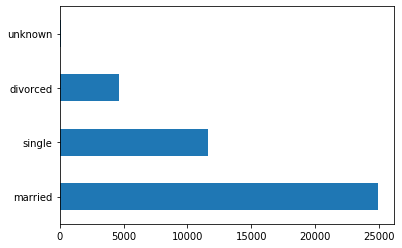

In [148]:
df['marital'].value_counts().plot(kind='barh')

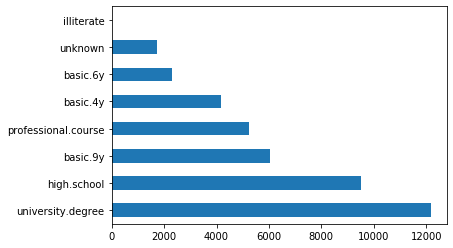

In [149]:
df['education'].value_counts().plot(kind='barh')

In [ ]:
df['loan'].value_counts().plot(kin)

### Analysis
Business Problem 1: To what extent people with loan signed up for the product?<br>
Hypothesis 1-1: Someone with a a loan did not subscribe a term deposit. Remark: A term deposit is a fixed-term investment, so the clients only can withdraw their moeny at the expiration date <br>
    - Reason: Their priority is to back their loan, rather than investing their disposable income on a term deposit <br>
Hypothesis 1-2: Someone with a credit-default did not subscribe a term deposit.
    - Reason: Same as the previous reason
    
   - Step 1: Groupby(Y)-Loan -> Yes-Yes, Yes-No, No-Yes, No-No
   - Step 2: Groupby(Y)-Housing Loan -> Yes-Yes, Yes-No, No-Yes, No-No
   - Step 3: Groupby(Y)-Housing Loan & Loan -> Yes(1)-Yes(1)-Yes(1), Yes(1)-Yes(1)-No(0), Yes(1)-No(0)-Yes(1)
       - Even though they have both loans or one of loans, they still subscribed -> Possible Observation: Given total subscribers, X number of people still subscribed when house, personal, or both loan. Therefore, loan itselfs did not necessarily affect the decision of deposit

- Q: Do people with a credit default still subscribe the deposit? If they do, how much time was it spent from phone calls? -> Possible answer: Not many people subscribed, so the allocation resources should be adjusted to other customers

Business Problem 2: Who is our target group?
- Q: Which customer segement based on the age/education/marital/job subscribed the new financial product? -> Can be done with a pivot table
- A: People with X age group with Y education level, Z marital status, Z-1 job should be mainly focused for marketing

Busines Problem 3: What is the conversation rate from the campaign?
- Q: How many number of contacts are performed to persuade the client to sign up?

Q: Did new marketing campaign help to sign up for a new product from the previous sucessfult marketing campaign?

Q: How did CPI or CCI, employement rate influence the new customers?

In [362]:
# Step 1
# sign up
print('% of people with a loan signed up deposit:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['loan'] == 'yes')]) / len(df)))
print('% of people without a loan signed up deposit:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['loan'] == 'no')]) / len(df)))
# no
print('% of people with a loan did not sign up deposit:','{:.2%}'.format(len(df[(df['y'] == 'no') & (df['loan'] == 'yes')]) / len(df)))
print('% of people without a loan did not sign up deposit:','{:.2%}'.format(len(df[(df['y'] == 'no') & (df['loan'] == 'no')]) / len(df)))

% of people with a loan signed up deposit: 1.66%
% of people without a loan signed up deposit: 9.35%
% of people with a loan did not sign up deposit: 13.51%
% of people without a loan did not sign up deposit: 73.08%


In [360]:
# Step 2
print('% of people with a housing loan signed up deposit:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['housing'] == 'yes')]) / len(df)))
print('% of people without a housing loan signed up deposit:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['housing'] == 'no')]) / len(df)))

print('% of people with a housing loan did not sign up deposit:','{:.2%}'.format(len(df[(df['y'] == 'no') & (df['housing'] == 'yes')]) / len(df)))
print('% of people without a housing loan did not sign up deposit:','{:.2%}'.format(len(df[(df['y'] == 'no') & (df['housing'] == 'no')]) / len(df)))

% of people with a housing loan signed up deposit: 6.09%
% of people without a housing loan signed up deposit: 4.92%
% of people with a housing loan did not sign up deposit: 46.30%
% of people without a housing loan did not sign up deposit: 40.29%


In [365]:
# Step 3
print('% of people with a personal and housing loan signed up:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['loan'] == 'yes') & (df['housing'] == 'yes')]) / len(df)))
print('% of people without a personal and with a housing loan signed up:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['loan'] == 'yes') & (df['housing'] == 'no')]) / len(df)))
print('% of people with a personal and without a housing loan signed up:','{:.2%}'.format(len(df[(df['y'] == 'yes') & (df['loan'] == 'no') & (df['housing'] == 'yes')]) / len(df)))

% of people with a personal and housing loan signed up: 0.99%
% of people without a personal and with a housing loan signed up: 0.67%
% of people with a personal and without a housing loan signed up: 5.09%


- People without a personal deposit signed up a bit more than people with a loan 
- However, people with a housing loan signed up more than people without a loan
- When people both have personal and housing loan, only 1% of people signed up
- <b>Observation: Personal loan discouraged more people to subscribe for the term deposit<b>

### Add visualization (previous stuffs)

In [300]:
df_2008 = df.iloc[:27690]
df_2009 = df.iloc[27690:39130]
df_2010 = df.iloc[39130:]

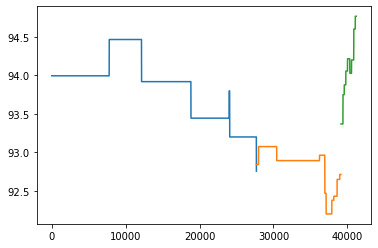

In [301]:
df_2008['cons.price.idx'].plot()
df_2009['cons.price.idx'].plot()
df_2010['cons.price.idx'].plot()

In [402]:
# df_2008[(df_2008['y'] == 'yes')].
df_2008_ = df_2008[(df_2008['y'] == 'yes')].set_index('cons.price.idx').groupby('cons.price.idx').count()['y'].sort_values()
df_2008__ = df_2008[(df_2008['y'] == 'no')].set_index('cons.price.idx').groupby('cons.price.idx').count()['y'].sort_values()
df_  = pd.DataFrame([df_2008_, df_2008__], index=['Yes', 'No']).T
df_

,Yes,No
cons.price.idx,,
92.756,1,9
93.200,190,3426
93.444,271,4904
93.798,42,25
93.918,407,6278
93.994,240,7523
94.465,188,4186


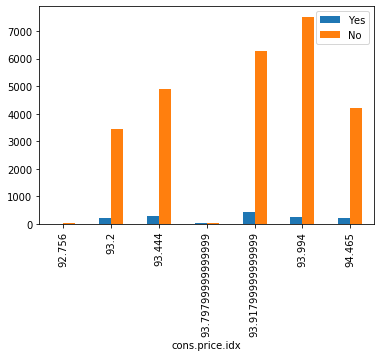

In [406]:
df_.plot.bar()

In [299]:
print(df_2008.shape[0])
print(df_2009.shape[0])
print(df_2010.shape[0])

print('Total Count 2008:', len(df_2008[df_2008['y'] == 'yes'])) # 6 months
print('Total Count 2009:', len(df_2009[df_2009['y'] == 'yes'])) # 8 months
print('Total Count 2010:', len(df_2010[df_2010['y'] == 'yes'])) # 7 months

print('2008_subscribe:', "{:.2%}".format(len(df_2008[df_2008['y'] == 'yes']) / len(df_2008)))
print('2009_subscribe:', "{:.2%}".format(len(df_2009[df_2009['y'] == 'yes']) / len(df_2009)))
print('2010_subscribe:', "{:.2%}".format(len(df_2010[df_2010['y'] == 'yes']) / len(df_2010)))

27690
11440
2058
Total Count 2008: 1339
Total Count 2009: 2228
Total Count 2010: 1073
2008_subscribe: 4.84%
2009_subscribe: 19.48%
2010_subscribe: 52.14%


In [310]:
import math
def age_categorize(age):
    return math.floor(age / 10) * 10

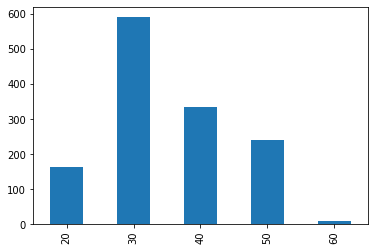

In [332]:
df_2008_y = df_2008[df_2008['y'] == 'yes']
df_2008_y.set_index('age').groupby(age_categorize).count()['y'].plot(kind='bar')

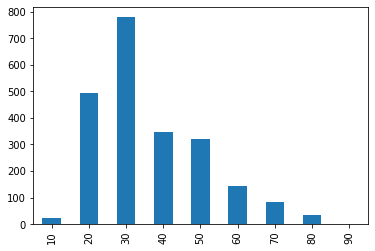

In [330]:
df_2009_y = df_2009[df_2009['y'] == 'yes']
df_2009_y.set_index('age').groupby(age_categorize).count()['y'].plot(kind='bar')

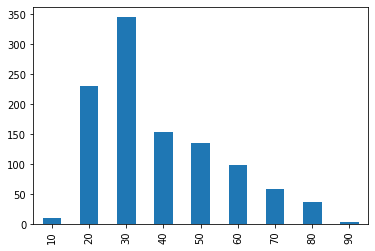

In [333]:
df_2010_y = df_2010[df_2010['y'] == 'yes']
df_2010_y.set_index('age').groupby(age_categorize).count()['y'].plot(kind='bar')

In [ ]:
df_2008_y = df_2008[(df_2008['y'] == 'yes') & (df_2008['house'])]
df_2008_y.set_index('age').groupby(age_categorize).count()['y'].plot(kind='bar')

In [223]:
hypo1_data = ({'Deposit_Y': [1, 1, 1], 'Deposit_N': [0, 0, 0], 'Loan_Y': [1, 1, 1], 'Loan_N': [0, 0, 0], 'Housing_Y': [1, 0, 1], 'Housing_N':[0, 0, 0], 'Total': [3, 2, 3]})
pd.DataFrame(hypo1_data, index=range(0, 3))

,Deposit_Y,Deposit_N,Loan_Y,Loan_N,Housing_Y,Housing_N,Total
0,1,0,1,0,1,0,3
1,1,0,1,0,0,0,2
2,1,0,1,0,1,0,3


In [211]:
per_no = "{:.2%}".format(len(df[(df['y'] == 'no')]) / len(df))
per_yes = "{:.2%}".format(len(df[(df['y'] == 'yes')]) / len(df))
print('% of clients whose did not subscribe:', per_no)
print('% of clients whose did subscribe:', per_yes)

% of clients whose did not subscribe: 88.73%
% of clients whose did subscribe: 11.27%
